In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import plotly.express as px

### Teste

In [13]:
path = 'raw_data/INFLUD21.csv'
df1 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)

path = 'raw_data/INFLUD23.csv'
df2 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)

path = 'raw_data/INFLUD24.csv'
df3 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,06/01/2021,1,06/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,1382.0,ALAGOINHAS,290070.0,HOSPITAL REGIONAL DANTAS BIAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/01/2021,1,03/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE SUL,1385.0,ITABUNA,291480.0,HOSPITAL CALIXTO MIDLEJ FILHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/01/2021,1,07/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690.0,COMPLEXO HOSPITALAR DO TRABALHADOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/01/2021,1,05/01/2021,1,PR,17RS LONDRINA,1371.0,LONDRINA,411370.0,HCL HOSPITAL DO CANCER DE LONDRINA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/01/2021,2,04/01/2021,1,RS,007 CRS,1596.0,DOM PEDRITO,430660.0,HOSPITAL SAO LUIZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17826,19/04/2021,16,13/04/2021,15,RS,012 CRS,1601.0,SAO BORJA,431800.0,HOSPITAL IVAN GOULART,...,NaN,NaN,FUNDACAO BUTANTAN,NaN,NaN,NaN,FUNDACAO BUTANTAN,210075,NaN,1.0
17827,19/04/2021,16,08/04/2021,14,SC,JOINVILLE,1565.0,JOINVILLE,420910.0,UPA 24 HORAS AVENTUREIRO,...,18/03/2021,NaN,BUTANTAN,NaN,NaN,NaN,BUTANTAN,210015,210010,1.0
17828,16/04/2021,15,06/03/2021,9,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,HOSPITAL GERAL DE PEDREIRA,...,NaN,NaN,FIOCRUZ,NaN,NaN,NaN,FIOCRUZ,NaN,NaN,1.0
17829,06/04/2021,14,30/03/2021,13,SP,GVE VII SANTO ANDRE,1332.0,SAO CAETANO DO SUL,354880.0,HOSPITAL SAO LUIZ SAO CAETANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
## agrupando
df1['DT_NOTIFIC'] = pd.to_datetime(df1['DT_NOTIFIC'], format="%d/%m/%Y" )
time_series1 = df1.groupby(df1['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series1.columns = ['Date', 'Number']
time_series1 = time_series1.sort_values('Date')
time_series1

,Date,Number
0,2021-01-03,2
1,2021-01-04,8
2,2021-01-05,19
3,2021-01-06,18
4,2021-01-07,30
...,...,...
421,2022-09-19,1
422,2022-10-05,1
423,2022-11-09,1
424,2023-01-04,1


In [16]:
## agrupando
df2['DT_NOTIFIC'] = pd.to_datetime(df2['DT_NOTIFIC'], format="%d/%m/%Y" )
time_series2 = df2.groupby(df2['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series2.columns = ['Date', 'Number']
time_series2 = time_series2.sort_values('Date')
time_series2

,Date,Number
0,2023-01-01,69
1,2023-01-02,234
2,2023-01-03,407
3,2023-01-04,496
4,2023-01-05,621
...,...,...
526,2025-02-06,1
527,2025-02-23,1
528,2025-03-01,1
529,2025-03-03,1


In [17]:
## agrupando
df3['DT_NOTIFIC'] = pd.to_datetime(df3['DT_NOTIFIC'], format="%d/%m/%Y" )
time_series3 = df3.groupby(df3['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series3.columns = ['Date', 'Number']
time_series3 = time_series3.sort_values('Date')
time_series3

,Date,Number
0,2023-12-31,28
1,2024-01-01,64
2,2024-01-02,201
3,2024-01-03,262
4,2024-01-04,330
...,...,...
445,2025-04-01,2
446,2025-04-02,10
447,2025-04-03,24
448,2025-04-04,9


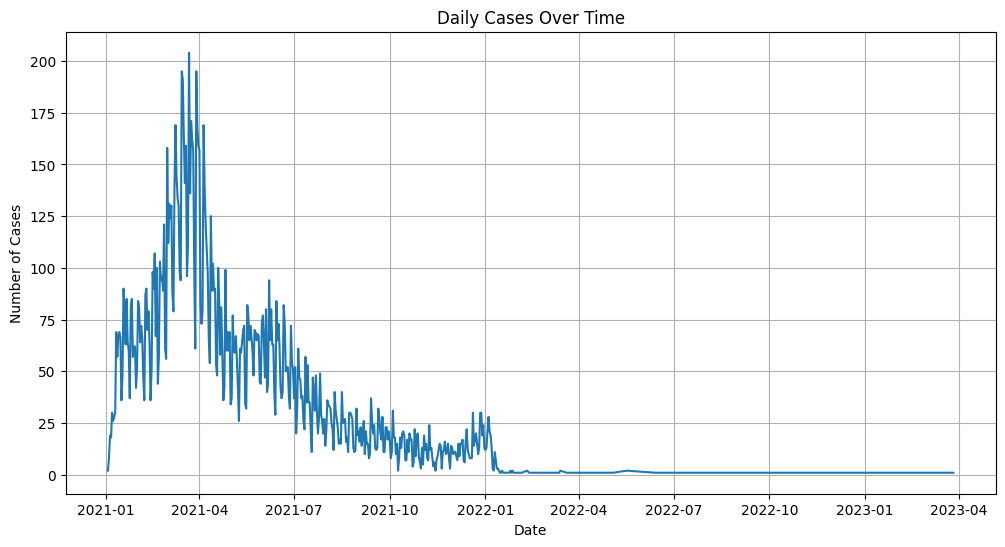

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="Number",
             data=time_series)
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

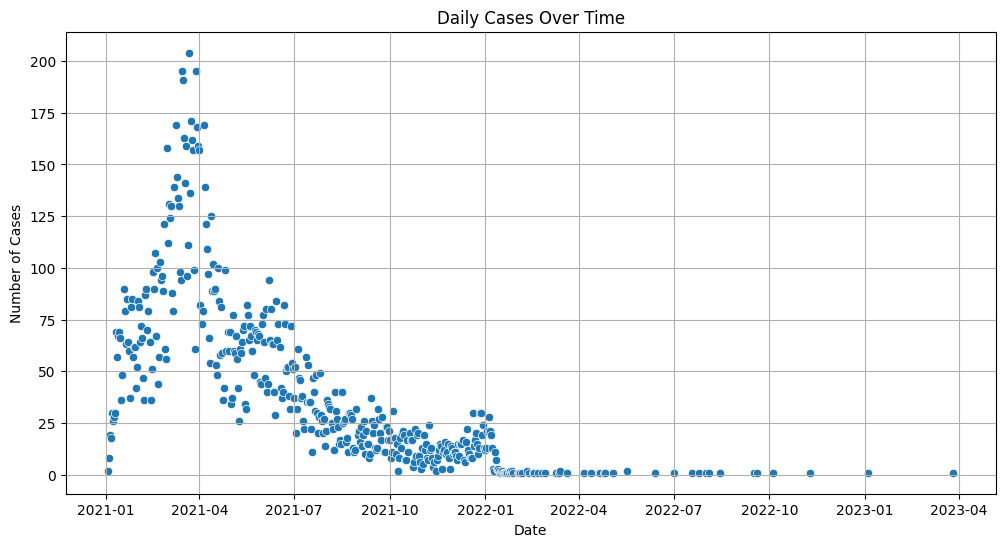

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Date", y="Number", data=time_series)  # Gráfico de pontos
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

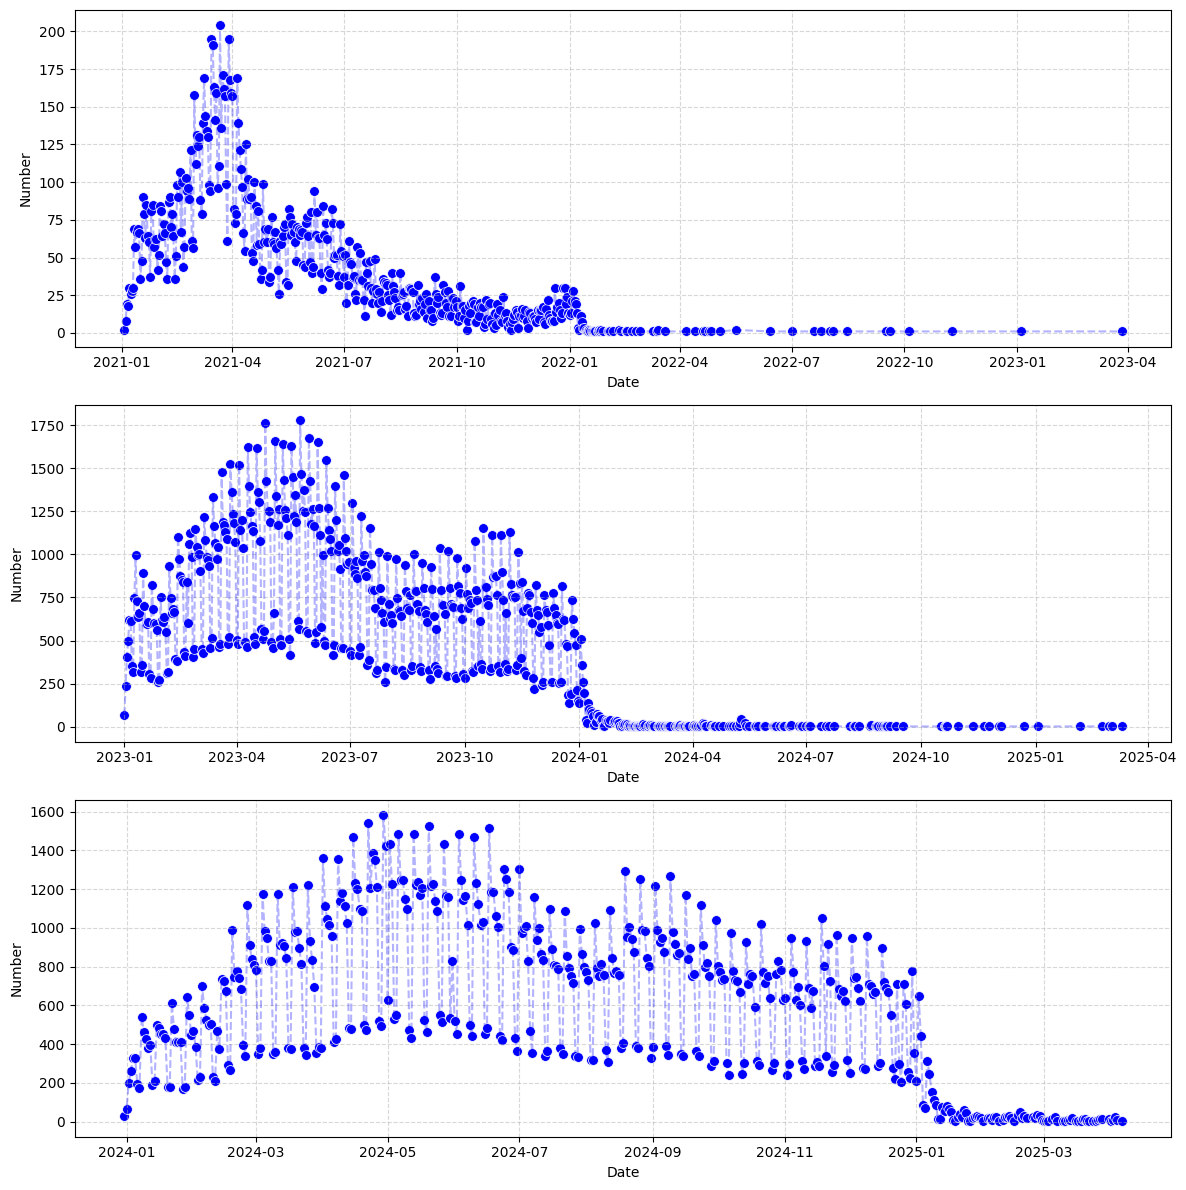

In [22]:
# Configuração da figura com 3 subplots (sem compartilhar eixos x)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12), sharex=False)

# Loop para plotar cada série em um subplot
for ax, ts in zip(axes, [time_series1, time_series2, time_series3]):
    sns.scatterplot(x="Date", y="Number", data=ts, ax=ax, s=50, color='blue')
    sns.lineplot(x="Date", y="Number", data=ts, ax=ax, alpha=0.3, color='blue', linestyle='--')
    ax.grid(True, linestyle='--', alpha=0.5)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

## Plotando gráfico para todos os anos

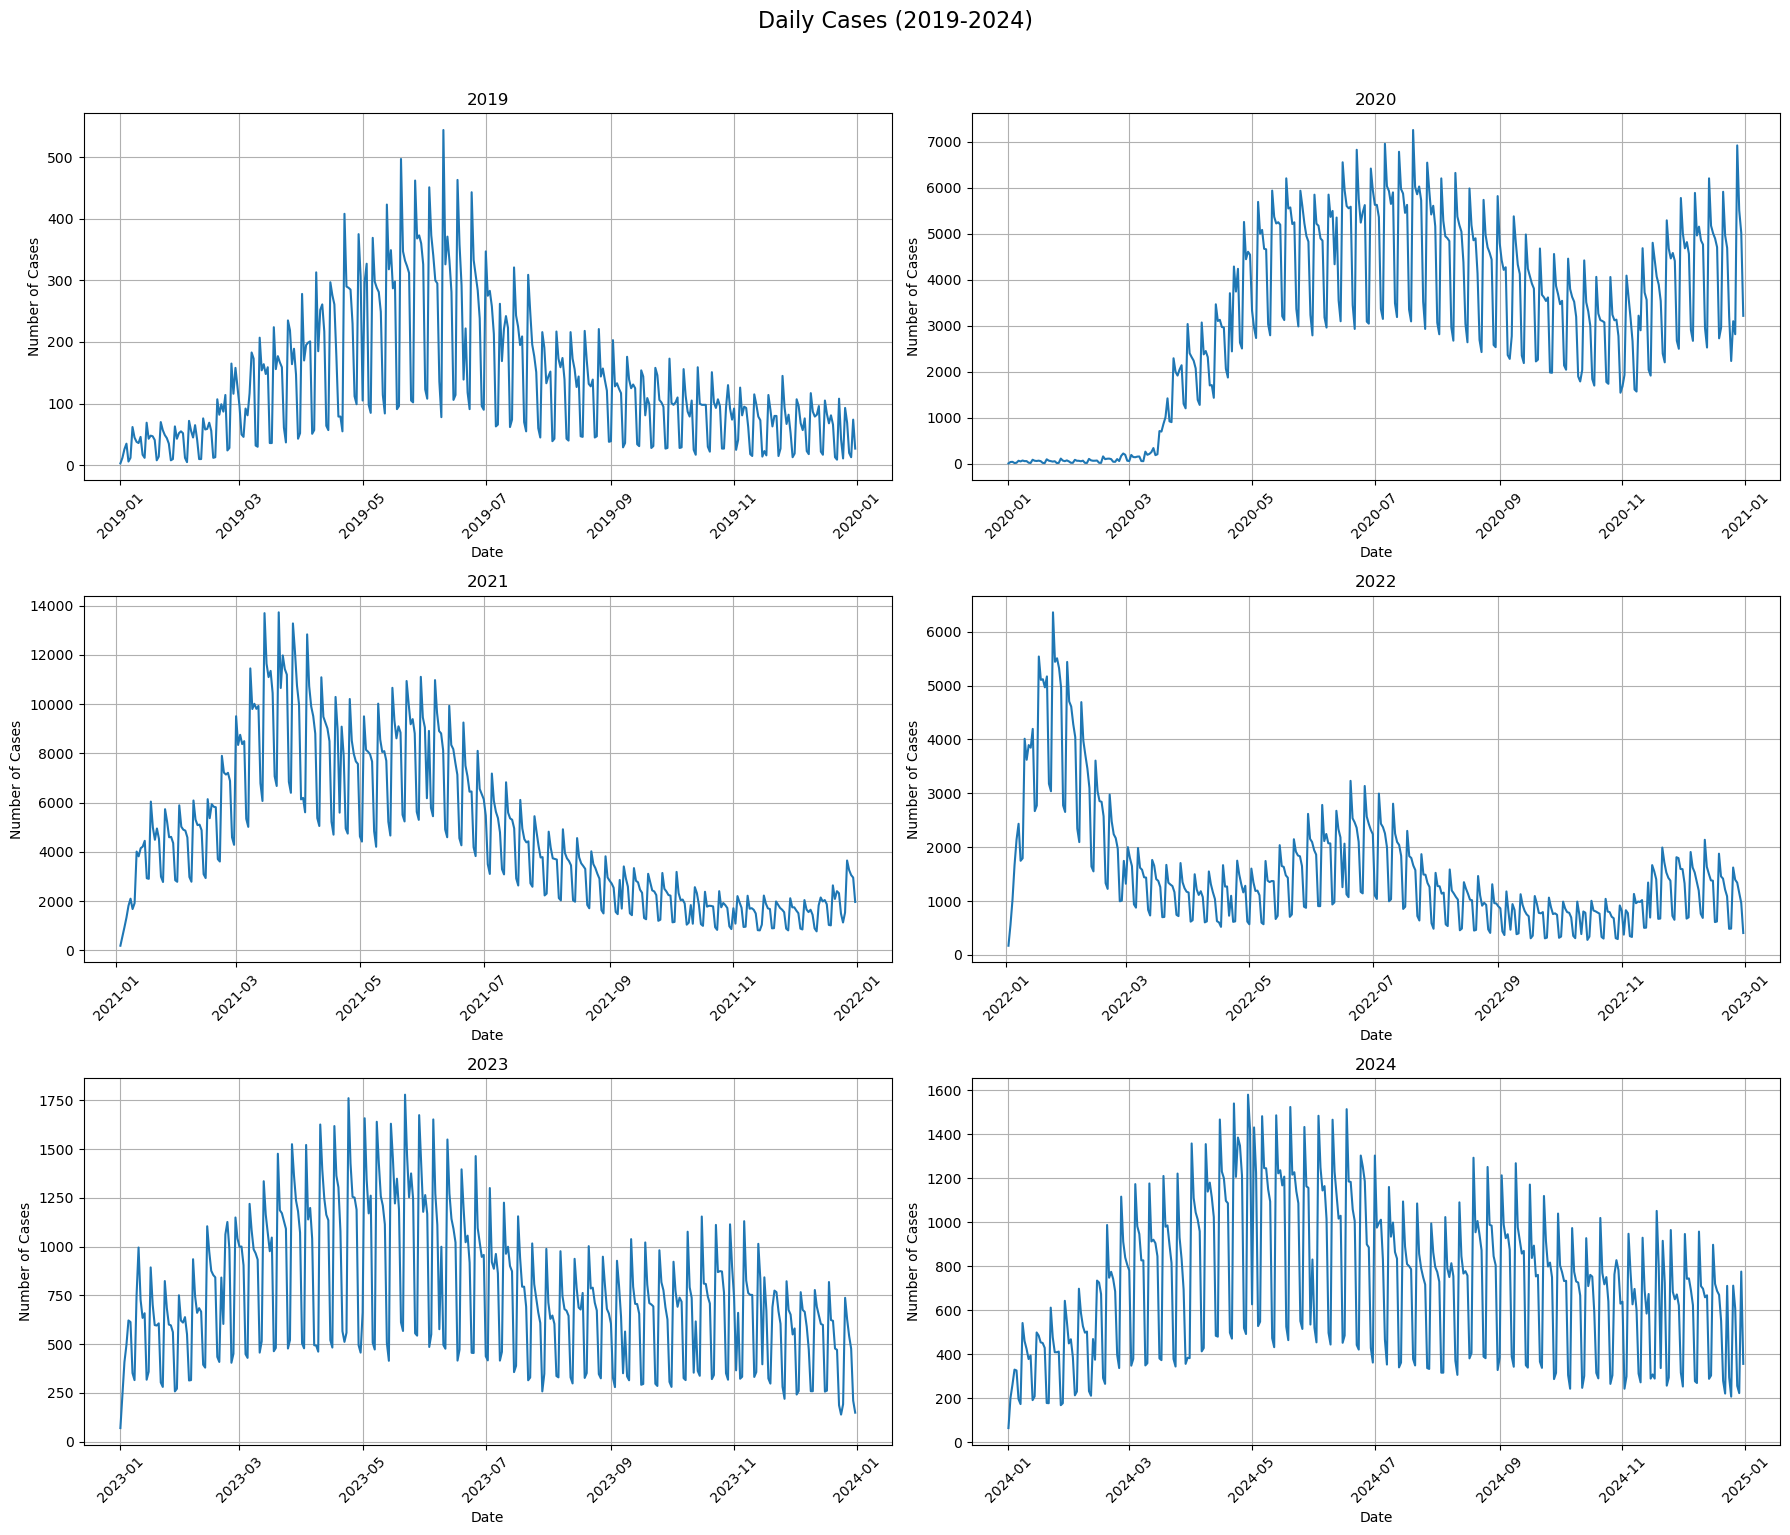

In [16]:
def Extrair_TS(path):
    df = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)
    df

    ## agrupando
    df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format="%d/%m/%Y" )

    # Filter records for the target year (EX: INFLUD20.csv -> 2020)
    start_date = pd.to_datetime(f"01/01/20{year}", format="%d/%m/%Y")
    end_date = pd.to_datetime(f"31/12/20{year}", format="%d/%m/%Y")
    df = df[(df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)]
    
    time_series = df.groupby(df['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
    time_series.columns = ['Date', 'Number']
    time_series = time_series.sort_values('Date')
    return time_series

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Daily Cases (2019-2024)', fontsize=16, y=1.02)

# Loop through years 2019-2024 (files INFLUD19.csv to INFLUD24.csv)
for i, year in enumerate(range(19, 25)):
    path = f'raw_data/INFLUD{year}.csv'
    ts = Extrair_TS(path)
    
    # Determine subplot position
    row = i // 2
    col = i % 2
    
    # Plot on the corresponding subplot
    ax = axes[row, col]
    sns.lineplot(x="Date", y="Number", data=ts, ax=ax)
    ax.set_title(f'20{year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.grid(True)
    
    # Rotate x-axis labels for readability
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
plt.show()

### metodo de filtragem e recorte por ano
    start_date = pd.to_datetime(f"01/01/20{year}", format="%d/%m/%Y")
    end_date = pd.to_datetime(f"31/12/20{year}", format="%d/%m/%Y")
    df = df[(df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)]
 

In [20]:
def load_and_filter_data(path, year):
    """Loads a dataset and filters records for the specified year."""
    df = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)
    df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format="%d/%m/%Y")
    
    # Filter records for the target year (e.g., INFLUD20.csv -> 2020)
    start_date = pd.to_datetime(f"01/01/20{year}", format="%d/%m/%Y")
    end_date = pd.to_datetime(f"31/12/20{year}", format="%d/%m/%Y")
    df = df[(df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)]
    
    return df

# Initialize an empty DataFrame to store all records
all_years = pd.DataFrame()

# Loop through years 2019-2024 (files INFLUD19.csv to INFLUD24.csv)
for year in range(19, 25):
    path = f'raw_data/INFLUD{year}.csv'
    try:
        df_year = load_and_filter_data(path, year)
        all_years = pd.concat([all_years, df_year], ignore_index=True)
    except FileNotFoundError:
        print(f"Warning: File {path} not found. Skipping.")
        continue

# Aggregate daily cases across all years
time_series = all_years.groupby(all_years['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series.columns = ['Date', 'Number']
time_series['Date'] = pd.to_datetime(time_series['Date'])
time_series = time_series.sort_values('Date')

# Plot the combined time series
plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Number", data=time_series)
plt.title('Daily Disease Cases (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

ParserError: Error tokenizing data. C error: out of memory

In [22]:
def load_and_filter_data(path, year):
    """Loads a dataset and filters records for the specified year."""
    df = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)
    df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format="%d/%m/%Y")    
    return df

# Initialize an empty DataFrame to store all records
all_years = pd.DataFrame()

# Loop through years 2019-2024 (files INFLUD19.csv to INFLUD24.csv)
for year in range(19, 25):
    path = f'raw_data/INFLUD{year}.csv'
    try:
        df_year = load_and_filter_data(path, year)
        all_years = pd.concat([all_years, df_year], ignore_index=True)
    except FileNotFoundError:
        print(f"Warning: File {path} not found. Skipping.")
        continue

# Aggregate daily cases across all years
time_series = all_years.groupby(all_years['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
time_series.columns = ['Date', 'Number']
time_series['Date'] = pd.to_datetime(time_series['Date'])
time_series = time_series.sort_values('Date')

# Plot the combined time series
plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Number", data=time_series)
plt.title('Daily Disease Cases (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

ParserError: Error tokenizing data. C error: out of memory

In [22]:
#salvando
time_series.to_csv('SRAG_time_series/SRAG_TS.csv', index=False)
print("CSV file saved successfully!")

CSV file saved successfully!
